**Random Forests Modeli**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [3]:
df = pd.read_csv("./dataset01.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division','NewLeague']])
y = df["Salary"]
X_ = df.drop (['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

**Model & Tahmin İşlemleri**

In [4]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [5]:
rf_model

RandomForestRegressor(random_state=42)

In [6]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.8719613101134

**Tuning Model**

In [7]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)
rf_model

RandomForestRegressor(random_state=42)

In [11]:
rf_params = {"max_depth": [5, 8, 10],
            "max_features": [2, 5, 10],
            "n_estimators": [200, 500, 1000, 2000],
            "min_samples_split": [2, 10, 80, 100]}

In [12]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=2000; total time=   1.4s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_est

In [14]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [17]:
rf_model = RandomForestRegressor(random_state = 42,
                                max_depth = 8,
                                max_features = 2,
                                min_samples_split = 2,
                                n_estimators = 200)
rf_tuned = rf_model.fit(X_train, y_train)

In [18]:
rf_tuned

RandomForestRegressor(max_depth=8, max_features=2, n_estimators=200,
                      random_state=42)

In [19]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

349.1649379391149

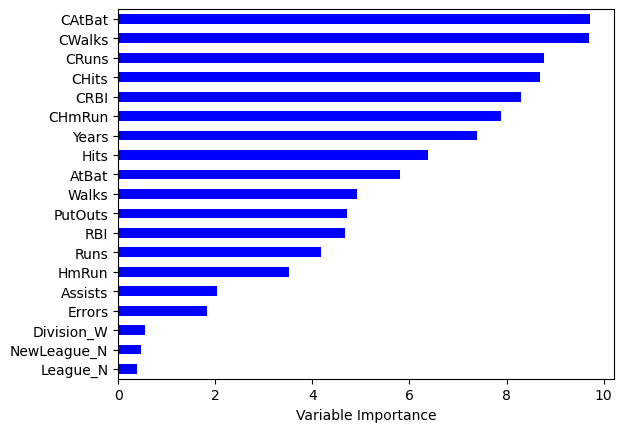

In [20]:
Importance = pd.DataFrame({'Importance': rf_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = 'Importance',
                      axis = 0,
                      ascending = True).plot(kind = 'barh',
                                            color = 'b')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None